# CODE APPENDIX

In [ ]:
# utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from collections import defaultdict
from tabulate import tabulate
from IPython.display import Latex, display
from scipy.stats import ttest_rel

# sklearn utils
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

# models
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import accuracy_score, roc_auc_score, SCORERS

## Cleaning up Surgical

In [ ]:
# Dataset 1: https://www.kaggle.com/omnamahshivai/surgical-dataset-binary-classification
# filename: Surgical-deepnet.csv
# Data dictionary: https://www.causeweb.org/tshs/datasets/Surgery%20Timing%20Data%20Dictionary.pdf
# target: complication
surgical = pd.read_csv('datasets/Surgical-deepnet.csv')

In [ ]:
surgical

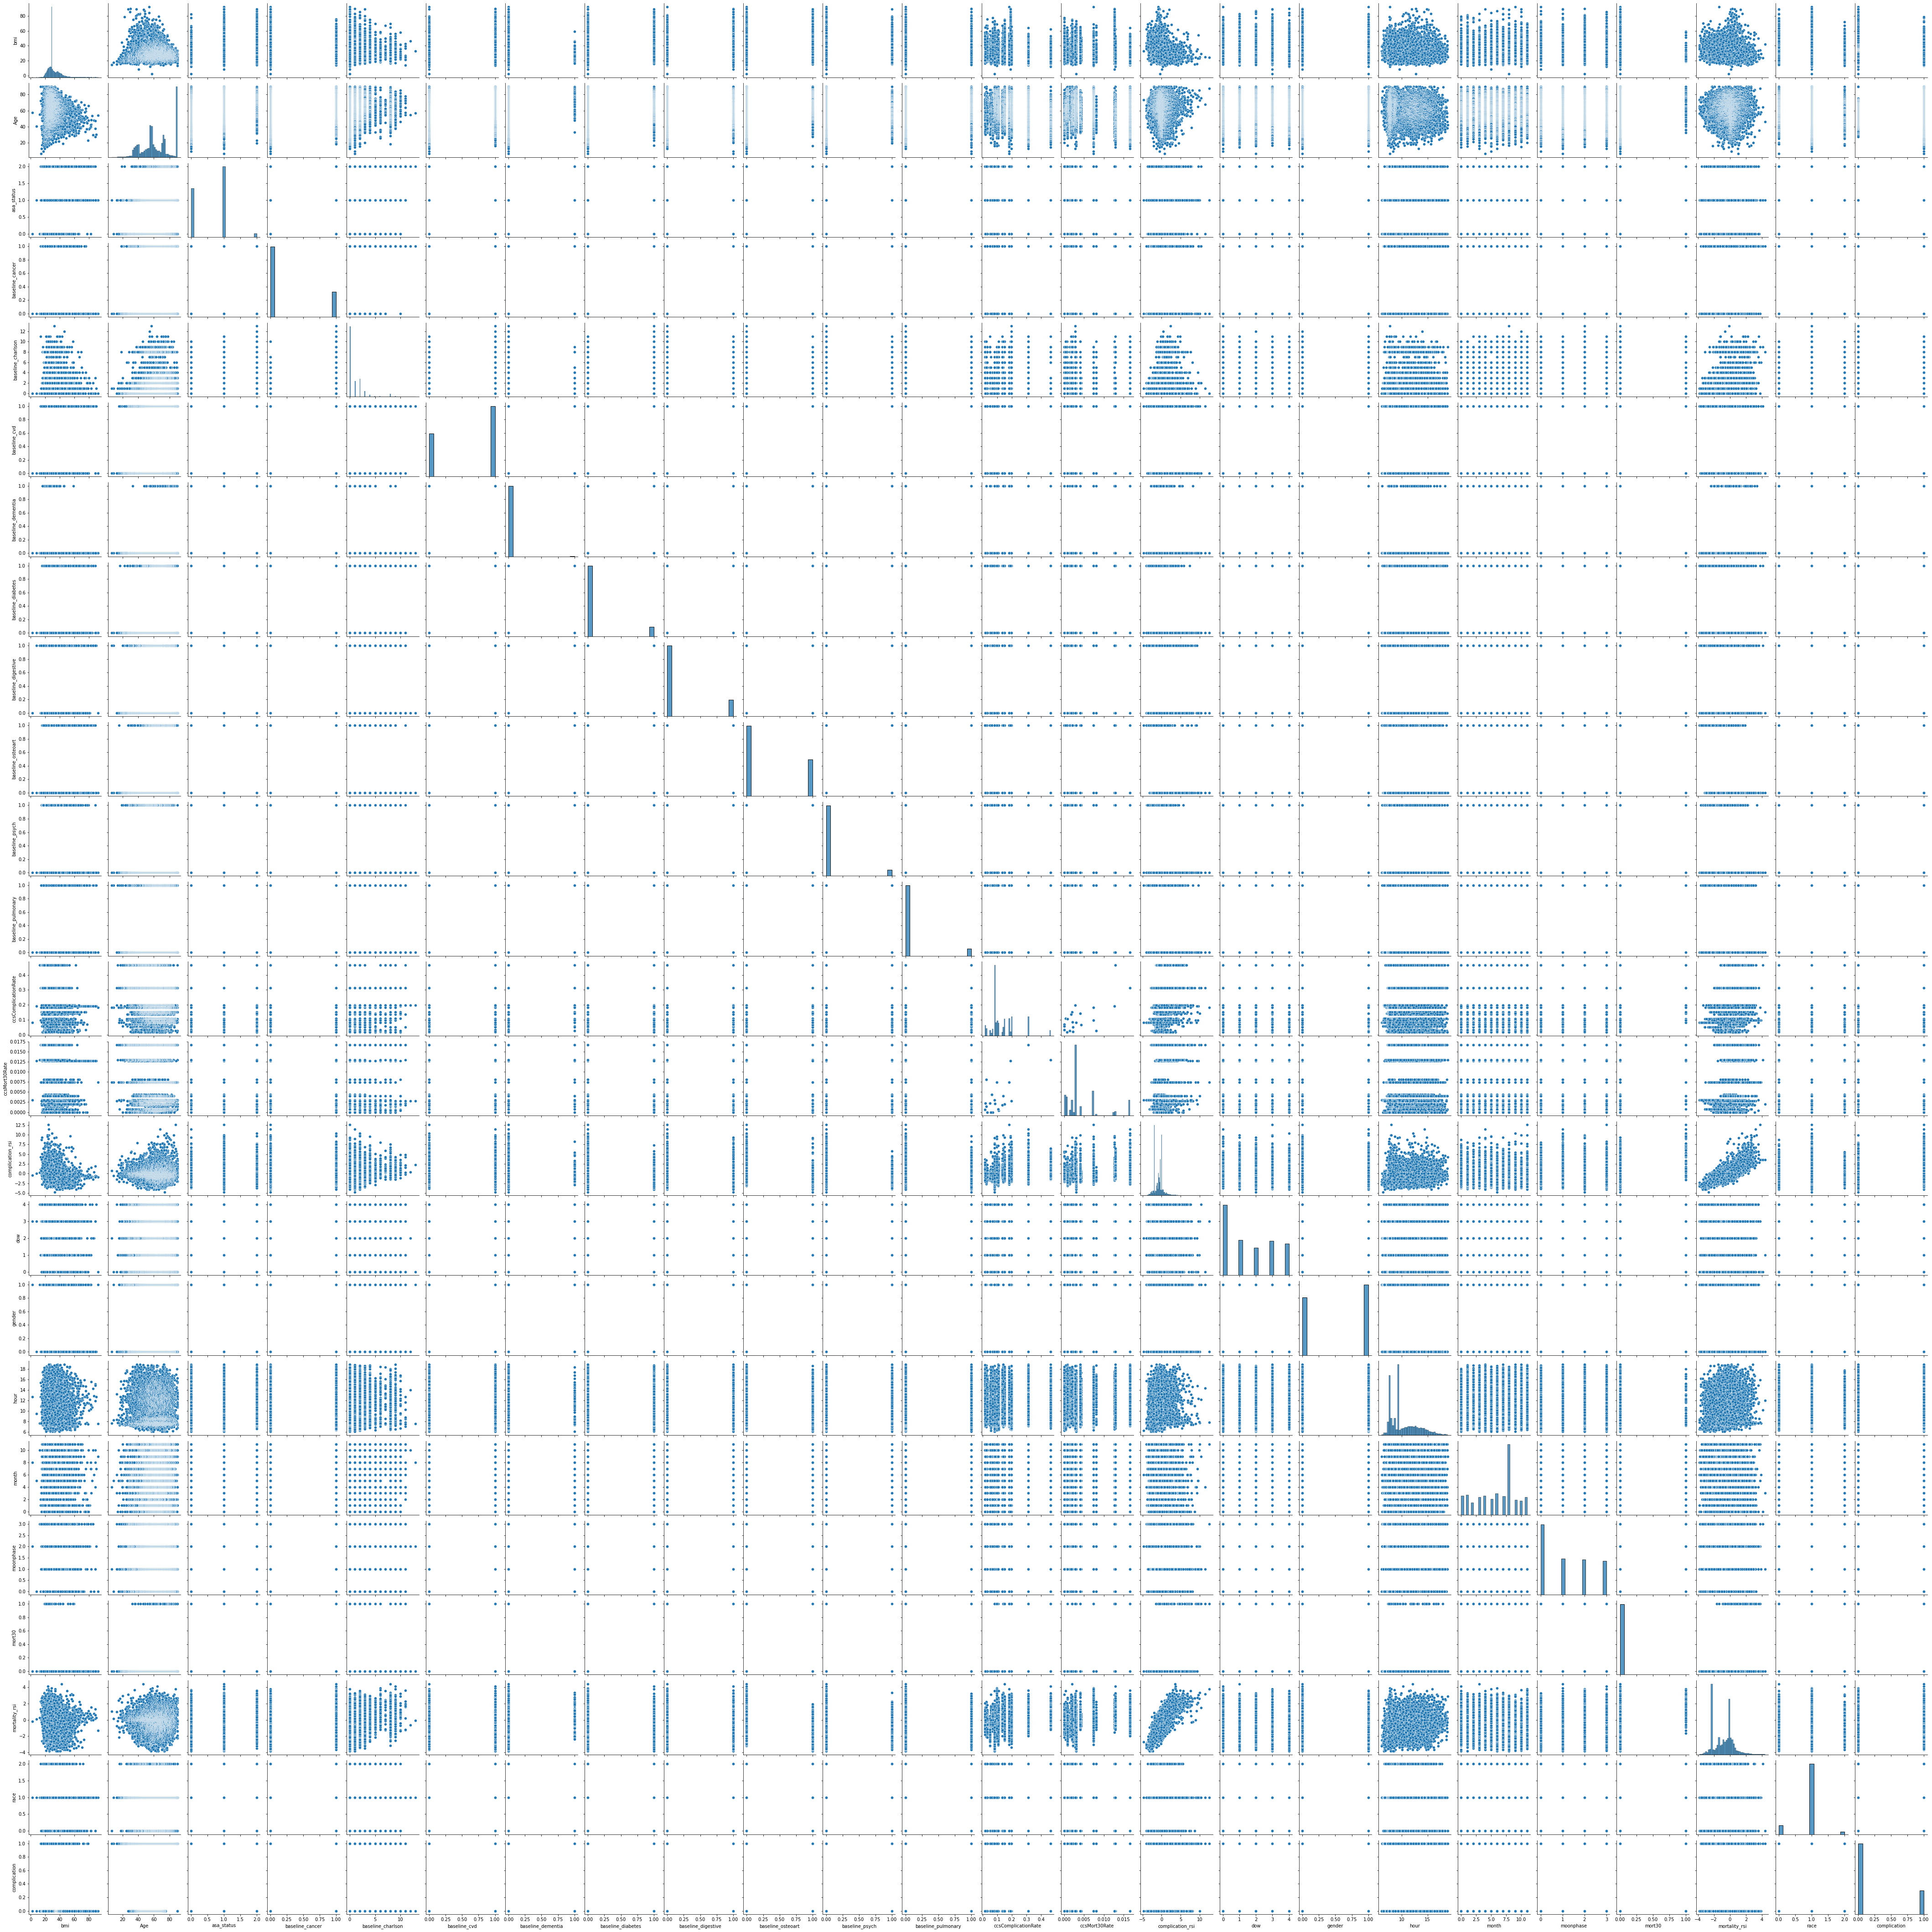

In [211]:
sns.pairplot(surgical)

In [ ]:
#surgical.describe()
pd.set_option('display.max_columns', None)

print("all columns: ", list(surgical.columns))
for column in surgical.columns.values:
        if len(surgical[column].unique()) < 50:
            print(f"{column}: ", surgical[column].unique())
# drop ahrq_ccs because we can just ccsComplicationRate as a standin
surgical = surgical.drop(['ahrq_ccs'],axis=1)
# as we can see, surgical has no null values
print('ALL ROWS WITH MISSING VALUES:')
surgical[surgical.isnull().any(axis=1)]

In [ ]:
# already one-hot encoded: baseline_cancer, baseline_cvd, baseline_dementia, baseline_diabetes, baseline_digestive, baseline_osteoart, baseline_psych, baseline_pulmonary, gender, mort30
surgical_standardized_features = ["bmi", "Age", "ccsComplicationRate", "ccsMort30Rate", "complication_rsi", "hour", "mortality_rsi"]
surgical_categorical_features = ['asa_status', "dow", 'month', 'moonphase', 'race'] # to be one-hot encoded
surgical_minmax_features = ['baseline_charlson']

surgical_transformer = ColumnTransformer(
                transformers=[
                    ('std', StandardScaler(), surgical_standardized_features),
                    ('onehot', OneHotEncoder(), surgical_categorical_features),
                    ('minmax', MinMaxScaler(), surgical_minmax_features)
                ], remainder='passthrough')


surgical_trans = surgical_transformer.fit_transform(surgical)
print(f"surgical_trans.shape: {surgical_trans.shape}")
X_surgical = surgical_trans[:, :-1]
print(f"X_surgical.shape: {X_surgical.shape}")
y_surgical = surgical_trans[:, -1]
print(f"y_surgical.shape: {y_surgical.shape}")
print(f"all(y_surgical == surgical['complication']): {all(y_surgical == surgical['complication'])}")

## Cleaning up churn

In [ ]:
# Dataset 2: https://www.kaggle.com/shrutimechlearn/churn-modelling
# filename: Churn_Modeling.csv
# target: Exited
churn = pd.read_csv('datasets/Churn_Modeling.csv')

In [ ]:
churn

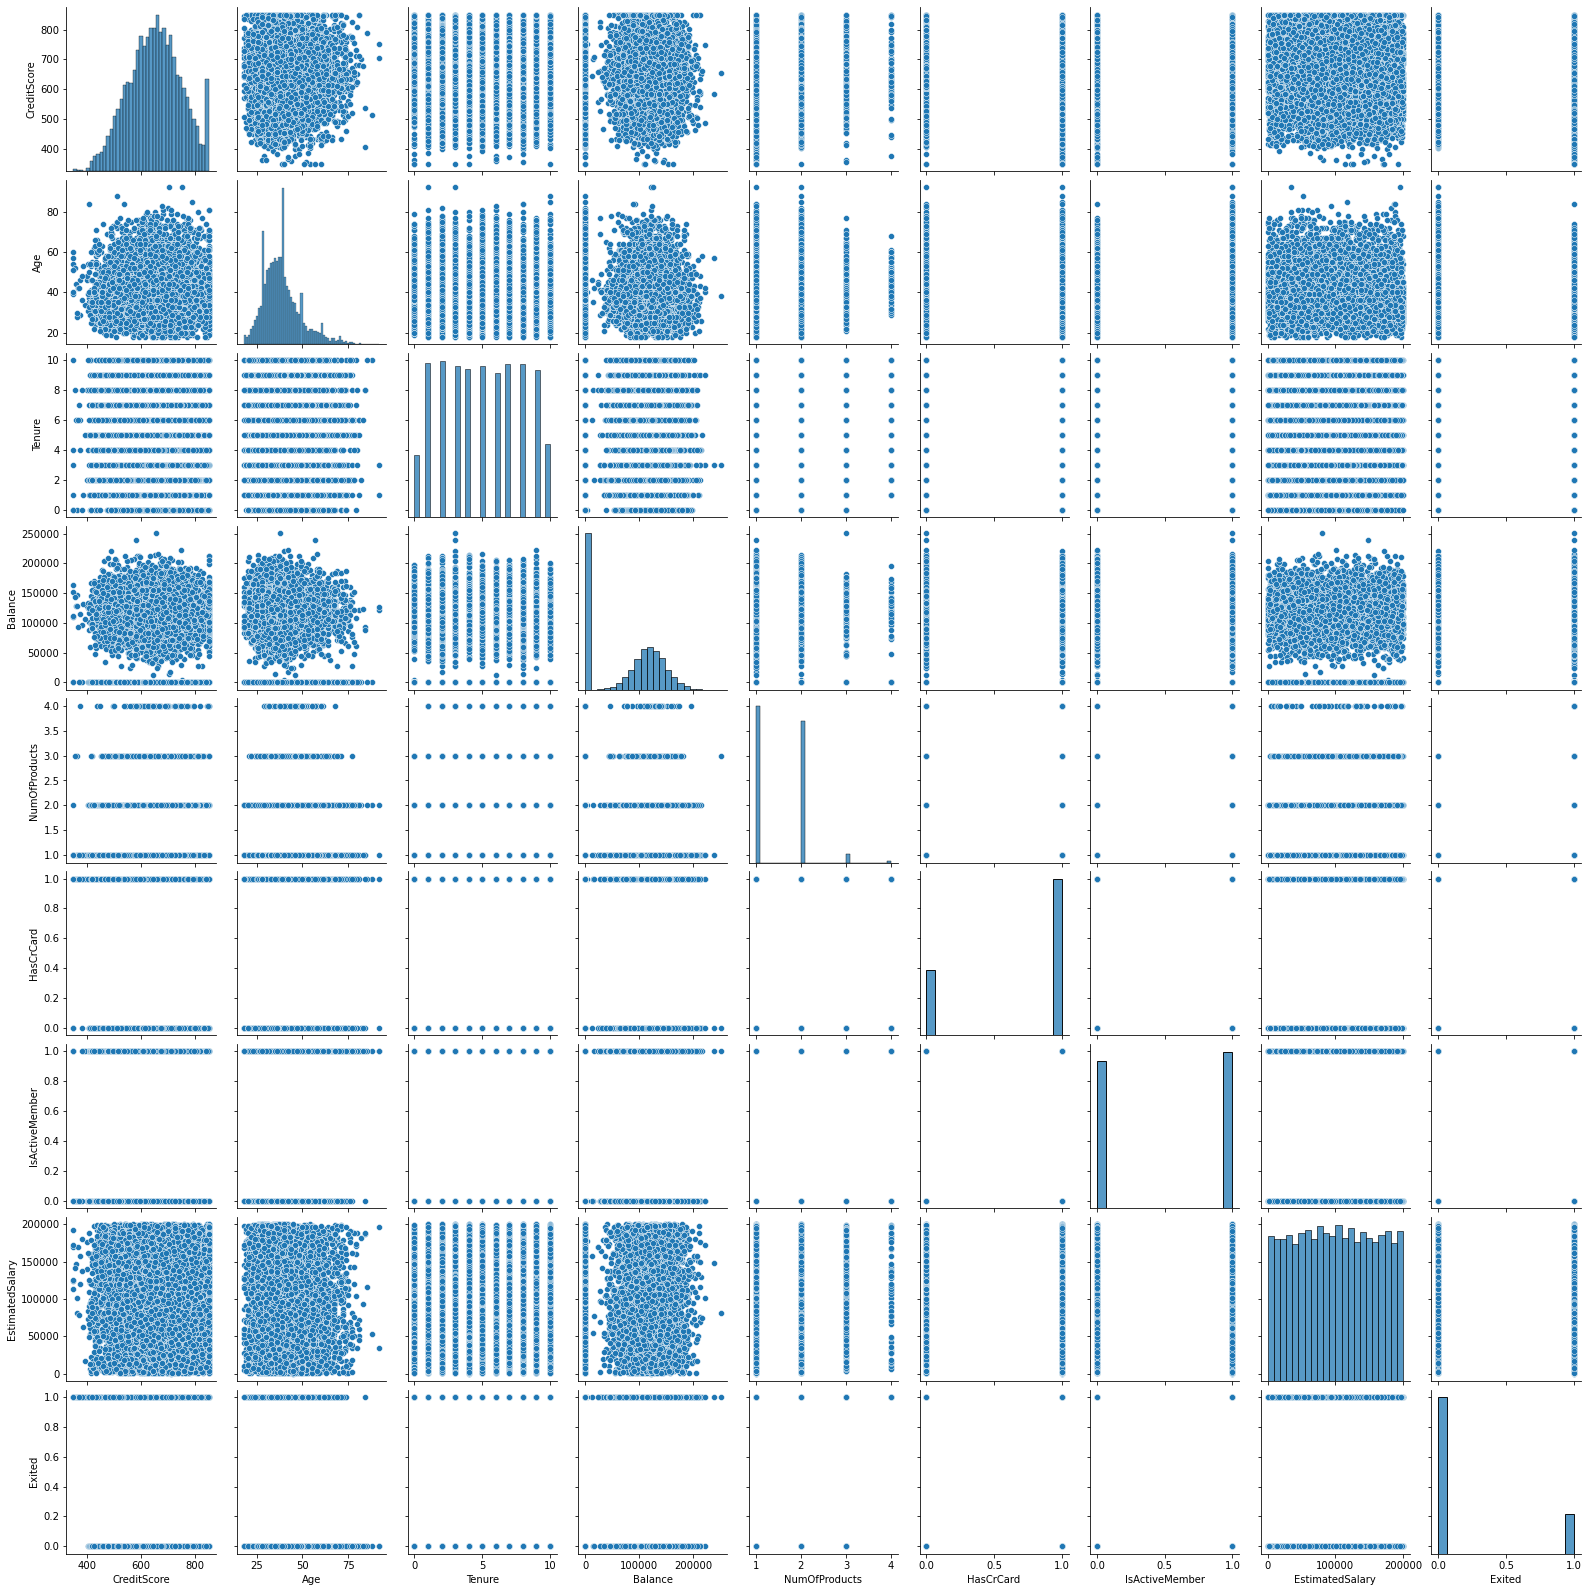

In [212]:
sns.pairplot(churn)

In [ ]:
# as we can see, churn has no null values
print('# OF ROWS WITH MISSING VALUES:', len(churn[churn.isnull().any(axis=1)]))

In [9]:
print("all columns: ", list(churn.columns))

for column in churn.columns.values:
        if len(churn[column].unique()) < 50:
            print(f"{column}: ", churn[column].unique())
            
# drop id's and rownumber
churn = churn.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1)

all columns:  ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Geography:  ['France' 'Spain' 'Germany']
Gender:  ['Female' 'Male']
Tenure:  [ 2  1  8  7  4  6  3 10  5  9  0]
NumOfProducts:  [1 3 2 4]
HasCrCard:  [1 0]
IsActiveMember:  [1 0]
Exited:  [1 0]


In [10]:
# already one-hot encoded: HasCrCard, IsActiveMember, Exited
churn_standardized_features = ["CreditScore", "Age", "Balance", 'EstimatedSalary']
churn_categorical_features = ['Geography', "Gender"] # to be one-hot encoded
churn_minmax_features = ['Tenure', 'NumOfProducts']

churn_transformer = ColumnTransformer(
                transformers=[
                    ('std', StandardScaler(), churn_standardized_features),
                    ('onehot', OneHotEncoder(), churn_categorical_features),
                    ('minmax', MinMaxScaler(), churn_minmax_features)
                ], remainder='passthrough')

churn_trans = churn_transformer.fit_transform(churn)
print(f"churn_trans.shape: {churn_trans.shape}")
X_churn = churn_trans[:, :-1]
print(f"X_churn.shape: {X_churn.shape}")
y_churn = churn_trans[:, -1]
print(f"y_churn.shape: {y_churn.shape}")
print(f"all(y_churn == churn['Exited']): {all(y_churn == churn['Exited'])}")

churn_trans.shape: (10000, 14)
X_churn.shape: (10000, 13)
y_churn.shape: (10000,)
all(y_churn == churn['Exited']): True


## Cleaning up ADULT

In [213]:
# Dataset 7: https://archive.ics.uci.edu/ml/datasets/Adult
# filenames: adult.data + adult.test
adult = pd.read_csv('datasets/ADULT/adult.data')

In [214]:
adult

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

      income_group  
0            <=50K  
1            <=50K  
2            <=50K  
3            <=50K  
4            <=50K  
...            ...  
32556        <=50K  
32557         >50K  
32558        <=50K  
32559        <=50K  
32560         >50K  

[32561 rows x 15 columns]

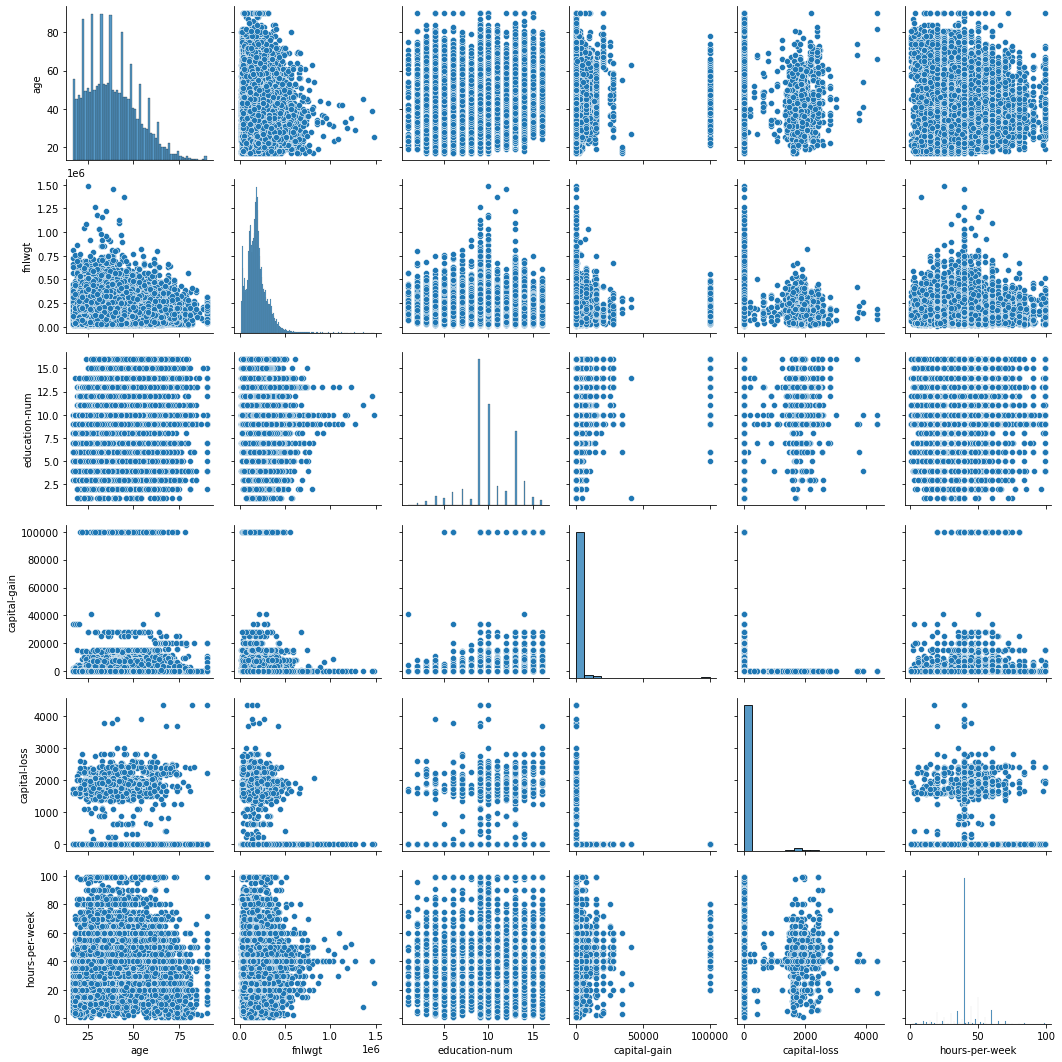

In [215]:
sns.pairplot(adult)

In [13]:
# as we can see, adult has no null values
print('# OF ROWS WITH MISSING VALUES:', len(adult[adult.isnull().any(axis=1)]))

# OF ROWS WITH MISSING VALUES: 0


In [14]:
print("all columns: ", list(adult.columns))

for column in adult.columns.values:
        if len(adult[column].unique()) < 50:
            print(f"{column}: ", adult[column].unique())
            
# drop id's and rownumber

all columns:  ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income_group']
workclass:  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education:  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num:  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status:  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation:  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' 

In [15]:
# already one-hot encoded: N/A
adult_standardized_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
adult_categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'] # to be one-hot encoded
#adult_label_feature = ['income_group']


adult_transformer = ColumnTransformer(
                transformers=[
                    ('std', StandardScaler(), adult_standardized_features),
                    ('onehot', OneHotEncoder(), adult_categorical_features),
#                    ('label', LabelEncoder(), adult_label_feature)
                ], remainder='passthrough', sparse_threshold=0)

adult['income_group'] = LabelEncoder().fit_transform(adult['income_group'])

adult_trans = adult_transformer.fit_transform(adult)
print(f"adult_trans.shape: {adult_trans.shape}")
X_adult = adult_trans[:, :-1]
print(f"X_adult.shape: {X_adult.shape}")
y_adult = adult_trans[:, -1]
print(f"y_adult.shape: {y_adult.shape}")
print(f"all(y_adult == adult['income_group']): {all(y_adult == adult['income_group'])}")

adult_trans.shape: (32561, 109)
X_adult.shape: (32561, 108)
y_adult.shape: (32561,)
all(y_adult == adult['income_group']): True


## cleaning up COV_TYPE

In [216]:
# Dataset 4: https://archive.ics.uci.edu/ml/datasets/covertype
# filename: COV_TYPE/covtype.data
cov_type = pd.read_csv('datasets/COV_TYPE/covtype.data')

In [217]:
cov_type

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1                                   -6                              390   
2                                   65                             3180   
3                                  118                             3090   
4                                   -1                              391   
...                                ...                              ...   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 221             232            148   
1                 220             235            151   
2                 234             238            135   
3                 238             238            122   
4                 220             234            150   
...               ...             ...            ...   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
0                                     6279                 1   
1                                     6225                 1   
2                                     6121                 1   
3                                     6211                 1   
4                                     6172                 1   
...                                    ...               ...   
581007                                 837                 0   
581008                                 845                 0   
581009                                 854                 0   
581010                                 864                 0   
581011                                 875                 0   

        Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  soil_type1  \
0                      0                 0                 0           0   
1                      0                 0                 0           0   
2                      0                 0                 0           0   
3                      0                 0                 0           0   
4                      0                 0                 0           0   
...                  ...               ...               ...         ...   
581007                 0                 1                 0           0   
581008                 0                 1                 0           0   
581009                 0                 1                 0           0   
581010                 0                 1                 0    

In [ ]:
# cov_type is too big to pairplot
# sns.pairplot(cov_type)

In [202]:
# as we can see, cov_type has no null values
print('# OF ROWS WITH MISSING VALUES:', len(cov_type[cov_type.isnull().any(axis=1)]))

# OF ROWS WITH MISSING VALUES: 0


In [203]:
# Just like Caruana, let's turn this into a binary classification problem and 
# only keep the rows of the most prevalent cover type in the dataset
most_prevalent_cover_type = -1; most_prevalence = -1
for cover_type in np.sort(cov_type['Cover_Type'].unique()):
    curr_prevalence = len(cov_type[cov_type['Cover_Type'] == cover_type])
    if curr_prevalence > most_prevalence: 
        most_prevalent_cover_type = cover_type; most_prevalence = curr_prevalence
    print(f"% of rows with cover type {cover_type}: ", f"{100*curr_prevalence/len(cov_type):.2f}%")

print(f"Setting all rows with cover type {most_prevalent_cover_type} as the positive class (1) and the rest as the negative class (0).")
cov_type['Cover_Type'] = np.array(cov_type['Cover_Type'] == most_prevalent_cover_type, dtype="int")
cov_type

% of rows with cover type 1:  36.46%
% of rows with cover type 2:  48.76%
% of rows with cover type 3:  6.15%
% of rows with cover type 4:  0.47%
% of rows with cover type 5:  1.63%
% of rows with cover type 6:  2.99%
% of rows with cover type 7:  3.53%
Setting all rows with cover type 2 as the positive class (1) and the rest as the negative class (0).


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1                                   -6                              390   
2                                   65                             3180   
3                                  118                             3090   
4                                   -1                              391   
...                                ...                              ...   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 221             232            148   
1                 220             235            151   
2                 234             238            135   
3                 238             238            122   
4                 220             234            150   
...               ...             ...            ...   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
0                                     6279                 1   
1                                     6225                 1   
2                                     6121                 1   
3                                     6211                 1   
4                                     6172                 1   
...                                    ...               ...   
581007                                 837                 0   
581008                                 845                 0   
581009                                 854                 0   
581010                                 864                 0   
581011                                 875                 0   

        Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  soil_type1  \
0                      0                 0                 0           0   
1                      0                 0                 0           0   
2                      0                 0                 0           0   
3                      0                 0                 0           0   
4                      0                 0                 0           0   
...                  ...               ...               ...         ...   
581007                 0                 1                 0           0   
581008                 0                 1                 0           0   
581009                 0                 1                 0           0   
581010                 0                 1                 0    

In [20]:
print("all columns: ", list(cov_type.columns))

for column in cov_type.columns.values:
        if len(cov_type[column].unique()) < 50:
            vals = cov_type[column].unique()
            vals.sort()
            print(f"{column}: ", vals)

all columns:  ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'soil_type1', 'soil_type2', 'soil_type3', 'soil_type4', 'soil_type5', 'soil_type6', 'soil_type7', 'soil_type8', 'soil_type9', 'soil_type10', 'soil_type11', 'soil_type12', 'soil_type13', 'soil_type14', 'soil_type15', 'soil_type16', 'soil_type17', 'soil_type18', 'soil_type19', 'soil_type20', 'soil_type21', 'soil_type22', 'soil_type23', 'soil_type24', 'soil_type25', 'soil_type26', 'soil_type27', 'soil_type28', 'soil_type29', 'soil_type30', 'soil_type31', 'soil_type32', 'soil_type33', 'soil_type34', 'soil_type35', 'soil_type36', 'soil_type37', 'soil_type38', 'soil_type39', 'soil_type40', 'Cover_Type']
Wilderness_Area1:  [0 1]
Wilderness_Area2:  [0 1]
Wilderness_Area3:  [0 1

In [21]:
# most columns are already one-hot encoded
cov_type_standardized_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                                  'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                                  'Horizontal_Distance_To_Fire_Points']


cov_type_transformer = ColumnTransformer(
                transformers=[
                    ('std', StandardScaler(), cov_type_standardized_features),
                ], remainder='passthrough')


cov_type_trans = cov_type_transformer.fit_transform(cov_type)
print(f"cov_type_trans.shape: {cov_type_trans.shape}")
X_cov_type = cov_type_trans[:, :-1]
print(f"X_cov_type.shape: {X_cov_type.shape}")
y_cov_type = cov_type_trans[:, -1]
print(f"y_cov_type.shape: {y_cov_type.shape}")
print(f"all(y_cov_type == cov_type['Cover_Type']): {all(y_cov_type == cov_type['Cover_Type'])}")

cov_type_trans.shape: (581012, 55)
X_cov_type.shape: (581012, 54)
y_cov_type.shape: (581012,)
all(y_cov_type == cov_type['Cover_Type']): True


## Testing Algorithms

In [22]:
# helper function for analyzing test set performance
def getClfBestMetricScore(clf, metric_name, cv_results_, X_train, y_train, X_test, y_test):
    metric_best_index = np.argmin(cv_results_[f'rank_test_{metric_name}'])
    metric_best_params = cv_results_['params'][metric_best_index]
    clf.set_params(**metric_best_params)
    print(f'best {clf} parameters for {metric_name}: {metric_best_params}')
    clf.fit(X_train, y_train)
    clf_best_metric_score = SCORERS[metric_name](clf, X_test, y_test)
    print(f'test set {metric_name} score: {clf_best_metric_score}')
    return clf_best_metric_score

In [23]:
# analysis variables

NUM_TRIALS = 5
MAX_ITER = 100000

# SVC param search spaces
test_svc_search_space = [{'kernel': ['linear', 'rbf'],
                          'C': np.logspace(-1, 1, 3)},
                        ]
full_svc_search_space = [{'kernel': ['rbf', 'sigmoid'],
                          'gamma': ['scale', 'auto'],
                          'C': np.logspace(-5, 4, 10)},
                         {'kernel': ['poly'],
                          'gamma': ['scale', 'auto'],
                          'C': np.logspace(-5, 4, 10),
                          'degree': [2, 3]},
                         {'kernel': ['linear'],
                          'C': np.logspace(-5, 4, 10)}
                        ] 

# LOGREG param search spaces
test_logreg_search_space = [{'penalty': ['l1', 'l2'],
                             'C': np.logspace(-1, 1, 3)}
                           ]
full_logreg_search_space = [{'penalty': ['l1', 'l2'],
                             'C': np.logspace(-5, 4, 10)},
                            {'penalty': ['none']}
                           ] 

# RF param search spaces
full_rf_search_space = [{'max_features': ['auto', 'sqrt', 'log2'],
                         'criterion': ['gini', 'entropy']}]

data_tups = [(X_surgical, y_surgical, 'SURGICAL'), (X_churn, y_churn, 'CHURN'), (X_adult, y_adult, 'ADULT'), (X_cov_type, y_cov_type, 'COV_TYPE')]
classifiers_tups = [(SVC(max_iter=MAX_ITER), full_svc_search_space, 'SVM'),
                    (LogisticRegression(max_iter=MAX_ITER, solver='saga'), full_logreg_search_space, 'LOGREG'),
                    (RandomForestClassifier(n_estimators=1024), full_rf_search_space, 'RF' )]
               
best_scores = {}
all_cv_results = {}
metrics = ['accuracy', 'f1', 'roc_auc']


In [ ]:
%%time

for X_data, y_data, data_name in data_tups:
    for clf, clf_search_space, clf_name in classifiers_tups:
        for trial in range(NUM_TRIALS):
            print(f"Tuning hyperparameters for {clf_name} on {data_name} dataset [trial {trial}]...")
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=5000, random_state=trial) # downsample majority?
            grid = GridSearchCV(clf, clf_search_space, cv=StratifiedKFold(n_splits=5), 
                     scoring=metrics, refit=False, verbose=0).fit(X_train, y_train)

            # save grid search results
            if data_name not in all_cv_results:
                
                all_cv_results[data_name] = {}
            if clf_name not in all_cv_results[data_name]:
                all_cv_results[data_name][clf_name] = [None]*NUM_TRIALS
            all_cv_results[data_name][clf_name][trial] = grid.cv_results_


            # save best scores
            if data_name not in best_scores:
                best_scores[data_name] = {}
            if clf_name not in best_scores[data_name]:
                best_scores[data_name][clf_name] = {}
            for metric in metrics:
                if metric not in best_scores[data_name][clf_name]:
                    best_scores[data_name][clf_name][metric] = [0]*NUM_TRIALS
                clf_best_metric_score = getClfBestMetricScore(clf, metric, grid.cv_results_, X_train, y_train, X_test, y_test)
                best_scores[data_name][clf_name][metric][trial] = clf_best_metric_score

In [25]:
# save results
np.save('all_cv_results.npy', all_cv_results)
np.save('best_scores.npy', best_scores)
#temp = np.load('best_scores.npy',allow_pickle='TRUE').item()

In [ ]:
all_cv_results

In [27]:
# pretty print a nested dictionary
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            pretty(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))
pretty(best_scores)

SURGICAL
	SVM
		accuracy
			[0.8, 0.7990659055526725, 0.7970939283860924, 0.8029060716139076, 0.8052932018681889]
		f1
			[0.49764816556914393, 0.49411764705882355, 0.49817518248175174, 0.49562317632346814, 0.5049573437860272]
		roc_auc
			[0.8013164879982685, 0.7941297956952895, 0.7924771842638257, 0.797931176322326, 0.8001148892057983]
	LOGREG
		accuracy
			[0.7925272444213803, 0.7949143746756616, 0.7949143746756616, 0.7973015049299429, 0.7932537623248573]
		f1
			[0.4799999999999999, 0.4646194926568759, 0.476215644820296, 0.48292295472597296, 0.48888888888888893]
		roc_auc
			[0.819725902550724, 0.8131976934480281, 0.8115785909035851, 0.8144507553180074, 0.8131537831537832]
	RF
		accuracy
			[0.8400622729631552, 0.8384016606123508, 0.8377789309807991, 0.8512714063310846, 0.8518941359626362]
		f1
			[0.6038994356080041, 0.5967947087255151, 0.5983975963945919, 0.6422662321383806, 0.6430884184308842]
		roc_auc
			[0.8973450654484558, 0.8940556624124507, 0.8933214553346723, 0.8978034129

## Analyzing Results

In [42]:
# why did I use a nested dictionary?? Bad Isaac. Baaaaaad Isaac. I should have just made a 2D pandas dataframe... 
# sigh... Guess I'll just convert it.
# columns: dataset | classifier | metric | trial | score
data = {'dataset':[], 'classifier':[], 'metric':[], 'trial':[], 'score':[]}
print('dataset\tclassifier\tmetric\ttrial\tscore')
for data_name in best_scores:
    for clf_name in best_scores[data_name]:
        for metric in best_scores[data_name][clf_name]:
            for trial, score in enumerate(best_scores[data_name][clf_name][metric]):
                #print(f"{data_name}\t{clf_name}\t{metric}\t{trial}\t{score:.4f}")
                data['dataset'].append(data_name)
                data['classifier'].append(clf_name)
                data['metric'].append(metric)
                data['trial'].append(trial+1)
                data['score'].append(score)
                
                
best_score_df = pd.DataFrame(data, columns=list(data.keys()))
best_score_df

dataset	classifier	metric	trial	score


dataset classifier    metric  trial     score
0    SURGICAL        SVM  accuracy      1  0.800000
1    SURGICAL        SVM  accuracy      2  0.799066
2    SURGICAL        SVM  accuracy      3  0.797094
3    SURGICAL        SVM  accuracy      4  0.802906
4    SURGICAL        SVM  accuracy      5  0.805293
..        ...        ...       ...    ...       ...
175  COV_TYPE         RF   roc_auc      1  0.901374
176  COV_TYPE         RF   roc_auc      2  0.902095
177  COV_TYPE         RF   roc_auc      3  0.898543
178  COV_TYPE         RF   roc_auc      4  0.903881
179  COV_TYPE         RF   roc_auc      5  0.896387

[180 rows x 5 columns]

### Generate Table 1 (description of problems)

In [100]:
# Generate table 1
table1 = [["PROBLEM", "#ATTR", "TRAIN SIZE", "TEST SIZE", "%POZ"]]
for X_data, Y_data, data_name in data_tups:
    #               PROBLEM       #ATTR             TRAIN SIZE   TEST SIZE             %POZ
    dataset_row = [data_name, X_data.shape[1], 5000, len(X_data) - 5000, f"{int(100*np.mean(Y_data))}%"]
    table1.append(dataset_row)

#latexify the table
table1_latex = tabulate(table1, tablefmt="latex")

# add in the other horizontal line
table1_latex_list = table1_latex.split("\n")
table1_latex_list.insert(3, "\hline")
table1_latex = "\n".join(table1_latex_list)
display(Latex(rf"LaTex for Table 1: {table1_latex}"))

<IPython.core.display.Latex object>

## Print table 2 data

In [48]:
pd.pivot_table(best_score_df.drop(['trial'],axis=1), columns=['classifier', 'metric'])

classifier    LOGREG                            RF                      \
metric      accuracy        f1   roc_auc  accuracy        f1   roc_auc   
score       0.802568  0.549357  0.828485  0.844217  0.668939  0.888875   

classifier       SVM                      
metric      accuracy        f1   roc_auc  
score       0.828401  0.630192  0.852891

### MEAN classifier score over all metrics and data data (MEAN column in Table 2 and Table 3)

In [51]:
pd.pivot_table(best_score_df.drop(['trial'],axis=1), columns=['classifier'])

classifier    LOGREG        RF       SVM
score       0.726803  0.800677  0.770495

### Check for statistically insignificant differences in table 2

In [208]:
for metric in best_score_df['metric'].unique():
    print(f"Checking for statistically insignificant differences between classifiers for {metric.upper()[:3]}...")
    # RF is highest scoring classifier
    best_scores_dist = np.array(best_score_df[(best_score_df['classifier'] == 'RF') & (best_score_df['metric'] == metric)]['score'])
    print(f"\tbest (RF) score distribution: \n{best_scores_dist}")
    for clf_name in best_score_df['classifier'].unique():
        if clf_name == 'RF': continue # don't need to check RF against itself
        curr_clf_scores_dist = np.array(best_score_df[(best_score_df['classifier'] == clf_name) & (best_score_df['metric'] == metric)]['score'])
        t, p = ttest_rel(curr_clf_scores_dist, best_scores_dist)
        print(f"\tchecking against {clf_name} scores dist: p = {p}", ("(\033[1mINSIGNIFICANT DIFFERENCE\033[0m)" if p>0.05 else ""))


Checking for statistically insignificant differences between classifiers for ACC...
	best (RF) score distribution: 
[0.84006227 0.83840166 0.83777893 0.85127141 0.85189414 0.8654
 0.8604     0.857      0.8614     0.867      0.85385146 0.8488081
 0.84851783 0.85337978 0.85033199 0.82114088 0.82127108 0.81631633
 0.82372242 0.81639619]
	checking against SVM scores dist: p = 0.0009374284375567621 
	checking against LOGREG scores dist: p = 5.563756920870249e-07 
Checking for statistically insignificant differences between classifiers for FSC...
	best (RF) score distribution: 
[0.60389944 0.59679471 0.5983976  0.64226623 0.64308842 0.59795057
 0.57089783 0.54358974 0.57823961 0.58683386 0.66561775 0.66358175
 0.65631966 0.6705344  0.66329197 0.82127791 0.8227943  0.81219862
 0.82449296 0.81671309]
	checking against SVM scores dist: p = 0.0022100417911829545 
	checking against LOGREG scores dist: p = 3.2093545999099624e-05 
Checking for statistically insignificant differences between classif

### Checking for statistically insignificant differences between classifiers for MEAN column

In [91]:
pd.pivot_table(best_score_df, columns=['classifier', 'trial'])

classifier    LOGREG                                                RF  \
trial              1         2         3         4         5         1   
score       0.726756  0.726591  0.721754  0.729232  0.729684  0.803069   

classifier                                               SVM            \
trial              2         3         4         5         1         2   
score       0.798053  0.792882  0.805082  0.804299  0.773572  0.768792   

classifier                             
trial             3        4        5  
score       0.76718  0.77078  0.77215

In [207]:
logreg_means = [0.726756, 0.726591, 0.721754, 0.729232, 0.729684]
rf_means = [0.803069, 0.798053, 0.792882, 0.805082, 0.804299]
svm_means = [0.773572, 0.768792, 0.76718, 0.77078, 0.77215]

t, p = ttest_rel(svm_means, rf_means)
print(f'SVM v. RF MEAN p-value: {p}')
t, p = ttest_rel(logreg_means, rf_means)
print(f'LOGREG v. RF MEAN p-value: {p}')
t, p = ttest_rel(rf_means, rf_means)
print(f'RF v. RF MEAN p-value: {p}')

SVM v. RF MEAN p-value: 3.1745064444648126e-05
LOGREG v. RF MEAN p-value: 2.839359222293215e-07
RF v. RF MEAN p-value: nan


### No insignificant differences in any columns for table 2! (so no asterisks in table 3)

## Print table 3 data

In [114]:
pd.pivot_table(best_score_df.drop(['trial'],axis=1), columns=['classifier', 'dataset'])

classifier    LOGREG                                     RF            \
dataset        ADULT     CHURN  COV_TYPE  SURGICAL    ADULT     CHURN   
score       0.803304  0.630863  0.777203  0.695844  0.80531  0.765242   

classifier                           SVM                                
dataset     COV_TYPE  SURGICAL     ADULT     CHURN  COV_TYPE  SURGICAL  
score       0.846574  0.785582  0.804545  0.753006  0.825704  0.698723

### MEAN classifier score over all metrics and data data (same as table 2 MEAN data)

In [115]:
pd.pivot_table(best_score_df.drop(['trial'],axis=1), columns=['classifier'])

classifier    LOGREG        RF       SVM
score       0.726803  0.800677  0.770495

### Check for statistically insignificant differences in table 3

In [120]:
for data_name in best_score_df['dataset'].unique():
    print(f"Checking for statistically insignificant differences between classifiers for {data_name}...")
    # RF is highest scoring classifier
    best_scores_dist = np.array(best_score_df[(best_score_df['classifier'] == 'RF') & (best_score_df['dataset'] == data_name)]['score'])
    print(f"\tbest (RF) score distribution: \n{best_scores_dist}")
    for clf_name in best_score_df['classifier'].unique():
        if clf_name == 'RF': continue # don't need to check RF against itself
        curr_clf_scores_dist = np.array(best_score_df[(best_score_df['classifier'] == clf_name) & (best_score_df['dataset'] == data_name)]['score'])
        t, p = ttest_rel(curr_clf_scores_dist, best_scores_dist)
        print(f"\tchecking against {clf_name} scores dist: p = {p}", ("(\033[1mINSIGNIFICANT DIFFERENCE\033[0m)" if p>0.05 else ""))


Checking for statistically insignificant differences between classifiers for SURGICAL...
	best (RF) score distribution: 
[0.84006227 0.83840166 0.83777893 0.85127141 0.85189414 0.60389944
 0.59679471 0.5983976  0.64226623 0.64308842 0.89734507 0.89405566
 0.89332146 0.89780341 0.89734853]
	checking against SVM scores dist: p = 1.67451870897372e-07 
	checking against LOGREG scores dist: p = 4.3289703704382915e-07 
Checking for statistically insignificant differences between classifiers for CHURN...
	best (RF) score distribution: 
[0.8654     0.8604     0.857      0.8614     0.867      0.59795057
 0.57089783 0.54358974 0.57823961 0.58683386 0.8656657  0.85814532
 0.8534458  0.8519253  0.86073966]
	checking against SVM scores dist: p = 0.00062488232704701 
	checking against LOGREG scores dist: p = 0.00010255111223237967 
Checking for statistically insignificant differences between classifiers for ADULT...
	best (RF) score distribution: 
[0.85385146 0.8488081  0.84851783 0.85337978 0.85033

### Since MEAN column for Table 3 is the same as MEAN column for Table 2, we can use the results of our significance testing for the MEAN column of Table 2 so no further significance testing is required

### Table 3 has two insignificant differences in the ADULT column for both the SVM and logistic regression classifiers

## Appendix tables

Except for p-values which I already calculated to create Table 2 and Table 3

### Generating mean training set performance table

In [210]:
# helper function for calculating training set performance
def getClfMetricBestTrainScore(clf, metric_name, cv_results_, X_train, y_train):
    metric_best_index = np.argmin(cv_results_[f'rank_test_{metric_name}'])
    metric_best_params = cv_results_['params'][metric_best_index]
    clf.set_params(**metric_best_params)
    print(f'best {clf} parameters for {metric_name}: {metric_best_params}')
    clf.fit(X_train, y_train)
    clf_best_train_metric_score = SCORERS[metric_name](clf, X_train, y_train)
    print(f'training set {metric_name} score: {clf_best_train_metric_score}')
    return clf_best_train_metric_score

In [ ]:
%%time

# Since I didn't store the training set performance when I initially testing the algorithms, I can use results of 
# the gridsearches I already performed to quickly get the training set performances of the algorithms
training_scores_data = {'dataset':[], 'classifier':[], 'metric':[], 'trial':[], 'score':[]}

for X_data, y_data, data_name in data_tups:
    for clf, clf_search_space, clf_name in classifiers_tups:
        for trial in range(NUM_TRIALS):
            print(f"Evaluating training set performance for {clf_name} on {data_name} dataset [trial {trial}]...")
            
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=5000, random_state=trial) # downsample majority?
            cv_results_ = all_cv_results[data_name][clf_name][trial]


            for metric in metrics:
                clf_best_train_metric_score = getClfMetricBestTrainScore(clf, metric, cv_results_, X_train, y_train)
                training_scores_data['dataset'].append(data_name)
                training_scores_data['classifier'].append(clf_name)
                training_scores_data['metric'].append(metric)
                training_scores_data['trial'].append(trial + 1)
                training_scores_data['score'].append(clf_best_train_metric_score)


In [187]:
train_best_scores_df = pd.DataFrame(training_scores_data, columns=list(data.keys()))
train_best_scores_df

dataset classifier    metric  trial     score
0    SURGICAL        SVM  accuracy      1  0.833600
1    SURGICAL        SVM        f1      1  0.905660
2    SURGICAL        SVM   roc_auc      1  0.797776
3    SURGICAL        SVM  accuracy      2  0.832600
4    SURGICAL        SVM        f1      2  0.522013
..        ...        ...       ...    ...       ...
175  COV_TYPE         RF        f1      4  1.000000
176  COV_TYPE         RF   roc_auc      4  1.000000
177  COV_TYPE         RF  accuracy      5  1.000000
178  COV_TYPE         RF        f1      5  1.000000
179  COV_TYPE         RF   roc_auc      5  1.000000

[180 rows x 5 columns]

### Training Set Table 2 Data

In [188]:
pd.pivot_table(train_best_scores_df.drop(['trial'],axis=1), columns=['classifier', 'metric'])

classifier   LOGREG                           RF                   SVM  \
metric     accuracy        f1   roc_auc accuracy   f1 roc_auc accuracy   
score        0.8072  0.557456  0.833891      1.0  1.0     1.0  0.86181   

classifier                      
metric            f1   roc_auc  
score       0.771315  0.886564

### Training Set MEAN column data

In [190]:
pd.pivot_table(train_best_scores_df.drop(['trial'],axis=1), columns=['classifier'])

classifier    LOGREG   RF       SVM
score       0.732849  1.0  0.839896

### Training Set Table 3 Data

In [189]:
pd.pivot_table(train_best_scores_df.drop(['trial'],axis=1), columns=['classifier', 'dataset'])

classifier    LOGREG                                  RF                 \
dataset        ADULT     CHURN  COV_TYPE  SURGICAL ADULT CHURN COV_TYPE   
score       0.813353  0.627368  0.785881  0.704795   1.0   1.0      1.0   

classifier                SVM                                
dataset    SURGICAL     ADULT     CHURN  COV_TYPE  SURGICAL  
score           1.0  0.843761  0.789278  0.896822  0.829723

## Appendix table with raw test set scores:

In [ ]:
# convert metric names
metric2short = {'accuracy': 'ACC', 'f1': 'FSC', 'roc_auc': 'ROC'}
best_score_df['metric'] = best_score_df['metric'].apply(lambda name: metric2short[name])

In [151]:
''' Failed attempt to put the raw test score table as two tables side by side
i = 1
table = ""
while 20*(i-1) < len(best_score_df):
    print(f'40*(i-1): {20*(i-1)}')
    #print(f'table: {table}')
    table += "\n" + best_score_df[(i-1)*20:i*20].to_latex(longtable=True, float_format="{:0.3f}".format) + "\quad"
    i += 1
Latex(table)
'''
Latex(best_score_df.to_latex(longtable=True, float_format="{:0.3f}".format))

<IPython.core.display.Latex object>

### SVC parameter table generator

In [178]:
# make SVC parameter table
table_svc_parameters = [['PROBLEM', '#ATTR', r'(num_features)^{-1}', r'(num_features * var(features))^{-1}']]
for X_data, y_data, data_name in data_tups:
    num_features = X_data.shape[1]
                #  PROBLEM        #ATTR  (num_features)^{-1}   (num_features * var(features))^{-1}
    #print(f"{data_name}\t{num_features}\t{int(num_features ** (-1))}\t{int((num_features * X_data.var()) ** (-1))}")    
    table_svc_parameters.append([data_name, num_features, f"{num_features ** (-1):.3f}", f"{(num_features * X_data.var()) ** (-1):.3f}"])
    
#latexify the table
table_svc_parameters_latex = tabulate(table_svc_parameters, tablefmt="latex")

# add in the other horizontal line
table_svc_parameters_latex_list = table_svc_parameters_latex.split("\n")
table_svc_parameters_latex_list.insert(3, "\hline")
table_svc_parameters_latex = "\n".join(table_svc_parameters_latex_list)

display(Latex(table_svc_parameters_latex))

<IPython.core.display.Latex object>

# FAILED ATTEMPT TO AUTO-GENERATE TABLE 2 AND TABLE 3

After 8 hours of coding it, I realized I had very erroneously assumed autogenerating the tables would mean less work for me... I was wrong, quite wrong. I leave this code graveyard here so you can gaze upon my attempt.

(I realized way later that it would have been much easier to autogenerate tables 2 and 3 using pandas)

In [ ]:
# generate the tables
tables = []

In [ ]:
# GENERATE TABLE 2

def getClfMetricScores(this_clf_name, metric):
    '''
    get a list of all the scores on this metric for this classifier on all datasets
    ''' 
    
    scores = [] # len(scores) should = # of datasets x # of trials
    
    for data_name in best_scores:
        for trial in best_scores[data_name][clf_name]:
            scores.append(trial[metric])

    if len(scores) != len(data_tups) * NUM_TRIALS:
        print('ERROR: len(scores) should = # of datasets x # of trials')
                
    return scores
   

# enter scores into table 2

#create header
table2 = [["MODEL"]]
table2[0].extend([metric.upper() for metric in metrics])
table2[0].append('MEAN')

# init metric_trial_scores
metric_trial_scores = {}
for metric in metrics:
    metric_trial_scores[metric] = {}


# add scores for all metrics and classifiers to table2
for clf_name in best_scores['surgical']:
                # MODEL
    clf_row = [clf_name.upper()]
    for metric in metrics:
        metric_trial_scores[metric][clf_name] = getClfMetricScores(clf_name, metric)
    
        # average score for this metric over all trials and datasets
        clf_row.append(f"{np.mean(metric_trial_scores[metric][clf_name]):.3f}")
    
    # mean score for this clf across metrics, trials, and datasets
    print(f"clf_row: {clf_row}")
    clf_row.append(f"{np.mean([float(score) for score in clf_row[1:]]):.3f}")
    table2.append(clf_row)


#latexify the table
table2_latex = tabulate(table2, tablefmt="latex")

# add in the other horizontal line
table2_latex_list = table2_latex.split("\n")
table2_latex_list.insert(3, "\hline")
table2_latex = "\n".join(table2_latex_list)

tables.append(table2_latex)

    
# add asterisks for non-significant differences and save boldface rows and cols
# boldface_table[2][3] = 1 => for clf 2 and and metric 3, score should be bold (0 = not bold)
boldface_table = np.zeros((len(table2), len(table2[0])))

#validation
if (len(table2[0]) != len(metrics) + 2):
    print("ERROR: len(tables[0]) should equal len(metrics) + 2")

for col, metric in enumerate(metrics):
    col += 1 # don't want to consider the column with classifier names
    num_clfs = best_scores['surgical']
    # loop over all clfs and calculate which ones are not statistically different from top scorer
    
    # find top scorer
    top_clf_score = 0; top_clf_scores = []; top_clf_row = 0
    for row,clf_name in enumerate(best_scores['surgical']):
        row += 1 # dont want to consider the title row 
        clf_metric_score_mean = np.mean(metric_trial_scores[metric][clf_name])
        if clf_metric_score_mean > top_clf_score:
            top_clf_score = clf_metric_score_mean
            top_clf_scores = metric_trial_scores[metric][clf_name]
            top_clf_row = row
        

    # save top score index to boldface later index
    boldface_table[top_clf_row][col] = 1
    
    # add asterisks to scores with non-significant differences
    for row, clf_name in enumerate(best_scores['surgical']):
        row += 1 # dont want to consider the title row 
        # all the scores (for all trials) on this metrics for this row's clf
        curr_clf_scores = metric_trial_scores[metric][clf_name]
        
        # compare for statistical difference
        t, p = ttest_rel(curr_clf_scores, top_clf_scores)
        #print(f'top_clf_scores: {top_clf_scores}\ncurr_clf_scores: {curr_clf_scores}\np: {p}')
        if p >= 0.05:
            # add asterisk
            table2[row][col] += "*"
        


#boldface the top scores
# validation
if (len(table2) != len(boldface_table) or len(table2[0]) != len(boldface_table[0])):
    print("ERROR 3")

print(table2)
print(boldface_table)
table2_latex_list = table2_latex.split("\n")
COL_OFFSET = 2; ROW_OFFSET = 2
for row in range(len(table2)):
    for col in range(len(table2[0])):
        if boldface_table[row][col] == 1:
            print(f"row: {row} | col: {col}")
            row_list = table2_latex_list[row + ROW_OFFSET].split(" ")
            print(f"row_list: {row_list}")
            print(f"before: {row_list[col + MODEL_AMP_OFFSET]}")
            row_list[col + MODEL_AMP_OFFSET] = "\textbf{" + row_list[col + MODEL_AMP_OFFSET] + "}"
            print(f"after: {row_list[col + MODEL_AMP_OFFSET]}")
            table2_latex_list[row + ROW_OFFSET] = " ".join(row_list)

# put the table back together again            
table2_latex = "\n".join(table2_latex_list)

In [ ]:
# GENERATE TABLE 3
def getClfDataScores(this_clf_name, this_data_name):
    
    '''
    get a list of all the scores on this metric for this classifier on all datasets
    get the best model for this classifier
    ''' 
    
    scores = [] # len(scores) should = # of datasets x # of trials x # of metrics
    
    for trial in best_scores[data_name][clf_name]:
        #print(f"trial.values(): {np.array(list(trial.values()))}")
        trial_metric_scores = list(trial.values())
        scores.append(np.mean(trial_metric_scores))
    
    '''
    for data_name in best_scores:
        if data_name == this_data_name:
            for clf_name in best_scores[data_name]:
                if clf_name == this_clf_name:
                    for i,trial in enumerate(best_scores[data_name][clf_name]):
                        print(f'trial {i}: {trial}')
                    scores = [np.mean(trial.values()) for trial in best_scores[data_name][clf_name]]
                    if len(best_scores[data_name][clf_name][0]) != NUM_TRIALS:
                        print('ERROR 4')
    '''
    if len(scores) != NUM_TRIALS:
        print('ERROR1')
                
    return scores


# init data_clf_scores: each data_name/clf_name key maps to the list of length
# NUM_TRIALS containing the average metric for all trials
data_clf_scores = {}
for data_name in best_scores:
    data_clf_scores[data_name] = {}

table3 = []
# each element = mean across metrics for that clf and data combo
for data_name in best_scores:
    #print('STARTING LOOP')
    # set the value of all rows (clfs) and find top scoring row values
    data_col = []; top_clf_score = 0; top_clf_scores = []; top_clf_row = 0
    for row, clf_name in enumerate(best_scores[data_name]):
        data_clf_scores[data_name][clf_name] = getClfDataScores(clf_name, data_name)
        clf_data_score_mean = np.mean(data_clf_scores[data_name][clf_name])
        if clf_data_score_mean > top_clf_score:
            top_clf_score = clf_data_score_mean
            top_clf_scores = data_clf_scores[data_name][clf_name]
            top_clf_row = row
        
        # append ALL the scores for this clf/data combo (will mean over trials later)
        data_col.append(data_clf_scores[data_name][clf_name])
    
    print(f"{data_name} data_col: {data_col}")
    
    # find rows that should be asterisked and save the row indices
    to_be_asterisked = []
    for row, curr_clf_scores in enumerate(data_col):
        #compare to top score distribution
        t, p = ttest_rel(curr_clf_scores, top_clf_scores)
        print(f'top_clf_scores: {top_clf_scores}\ncurr_clf_scores: {curr_clf_scores}\np: {p}')
        if p > 0.05:
            to_be_asterisked.append(row)
    
    # convert rows to strings and add asterisks
    temp = []
    for row, curr_clf_scores in data_col:
        curr_clf_avg_score = np.mean(curr_clf_scores) # average over all trials (for this dataset)
        temp.append(f"{curr_clf_avg_score:.3f}")
        if row in to_be_asterisked:
            temp[-1] += "*"
    data_col = temp
    
    # add the column to the table
    table3.append(data_col)

'''
what table3 looks like right now:
[[avg_c1d1, avg_c2d1], ...]
         ...
 [avg_c1dn], [avg_c2dn], ...]]

'''
print(f"what table3 looks like right now: \n{table3}")

# transpose table3
table3 = np.matrix(table3).T.tolist()

# add MEAN value (first convert from string to float, calc mean, then add mean to row as string)
for i,row in enumerate(table3):
    row_as_num = [float(score[:-1]) for score in row]
    table3[i] = row + [f"{np.mean(row_as_num):.3f}"]

print(f"table 3 after adding all numerical values: {table3}")

# add in algo names and dataset names (and MODEL and MEAN)
for i,name in enumerate(classifier_names):
    table3[i].insert(0, name.upper())


#add header
header = ["MODEL"]
header.extend([data_name.upper() for data_name in dataset_names])
header.append('MEAN')
table3.insert(0, header)

print(f"table 3 after adding all heading values: {table3}")


#latexify the table and add in the other horizontal line
table3_latex = tabulate(table3, tablefmt="latex")
table3_latex_list = table3_latex.split("\n")
table3_latex_list.insert(3, "\hline")
table3_latex = "\n".join(table3_latex_list)

tables.append(table3_latex)


# add scores for all metrics and classifiers to table2
for clf_name in best_scores['surgical']:
                # MODEL
    clf_row = [clf_name.upper()]
    for metric in metrics:
        metric_trial_scores[metric][clf_name] = getClfMetricScores(clf_name, metric)
    
        # average score for this metric over all trials and datasets
        clf_row.append(f"{np.mean(metric_trial_scores[metric][clf_name]):.3f}")
    
    # mean score for this clf across metrics, trials, and datasets
    print(f"clf_row: {clf_row}")
    clf_row.append(f"{np.mean([float(score) for score in clf_row[1:]]):.3f}")
    table2.append(clf_row)

In [ ]:
# print latex for all tables
for i, latex_table in enumerate(tables):
    print(f"LaTex for table {i}:")
    display(Latex(rf"{latex_table}"))